In [1]:
import pandas as pd
import numpy as np
data =pd.read_csv('amazon_phones.csv')

In [3]:
data.info()
data_transformed=data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        434 non-null    int64 
 1   title             434 non-null    object
 2   price             433 non-null    object
 3   rating            434 non-null    object
 4   brand             434 non-null    object
 5   screen_size       434 non-null    object
 6   battery_power     434 non-null    object
 7   ram               434 non-null    object
 8   storage           434 non-null    object
 9   operating_system  434 non-null    object
 10  item_weight       434 non-null    object
dtypes: int64(1), object(10)
memory usage: 37.4+ KB


In [4]:
data_transformed['price']

0      10,999.
1       8,999.
2      10,999.
3       8,499.
4       8,499.
        ...   
429    12,999.
430    20,999.
431    39,999.
432    17,999.
433    11,999.
Name: price, Length: 434, dtype: object

To convert the above values into numeric , coma and dot needs to be removed 

In [5]:
data_transformed['price']=data['price'].str.replace(',','').str.replace('.', '').fillna('-20').astype(int).replace({-20:np.nan})
data_transformed['price']

C:\Users\Harshith\AppData\Local\Temp\ipykernel_17916\3006279927.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_transformed['price']=data['price'].str.replace(',','').str.replace('.', '').fillna('-20').astype(int).replace({-20:np.nan})


In [6]:
data_transformed['rating']

0      3.9 out of 5
1      3.9 out of 5
2      4.2 out of 5
3      3.9 out of 5
4      3.9 out of 5
           ...     
429      3 out of 5
430      4 out of 5
431    3.8 out of 5
432    3.8 out of 5
433      4 out of 5
Name: rating, Length: 434, dtype: object

In [7]:
def transform_rating(df):
    try :

        df=df.split()[0]
        return df

    except AttributeError:
        return df


In [8]:

data_transformed['rating']=data_transformed['rating'].apply(lambda x: transform_rating(x))


In [11]:
data_transformed['rating']

0      3.9
1      3.9
2      4.2
3      3.9
4      3.9
      ... 
429      3
430      4
431    3.8
432    3.8
433      4
Name: rating, Length: 434, dtype: object

In [12]:
data_transformed['rating'][data_transformed['rating'].apply(lambda x: len(x) > 3)]

168    Previous
254    Previous
287    Previous
300    Previous
343    Previous
369    Previous
416    Previous
417    Previous
422    Previous
426    Previous
Name: rating, dtype: object

Need to change these values into NAN 

In [ ]:
data_transformed['rating'][data_transformed['rating'].apply(lambda x: len(x) > 3)]=np.nan


In [7]:
data_transformed['rating']=data_transformed['rating'].astype(float)
data_transformed['rating'].isnull().sum()


10

In [13]:
data_transformed['screen_size']

0      6.58 inches
1      6.71 inches
2      6.72 inches
3       6.5 inches
4       6.5 inches
          ...     
429     6.6 inches
430     6.6 inches
431     6.8 inches
432    6.67 inches
433     6.5 inches
Name: screen_size, Length: 434, dtype: object

In [8]:
def convert_units(value):
    
    parts = value.split()
    converted_value=0
        
    if len(parts) == 2:
        numeric_part = float(parts[0])
        unit = parts[1]
            
        if unit == 'cm':
            converted_value = numeric_part * 0.393701  # Convert cm to inches
        else:
            converted_value = numeric_part  # Keep the original value
        
        
    
    return converted_value

There are some values in inches and some in cm , so need to bring all values under same unit , so changed everything into inches

In [14]:
strings =data_transformed['screen_size'].apply(lambda x: transform_rating(x))
index=strings[strings.apply(lambda x: len(x) > 4)].index


In [15]:
data_transformed['screen_size'].loc[index]

5          16.72 cm
59         16.65 cm
65         16.72 cm
66         16.66 cm
79         16.66 cm
86     6.517 inches
98         16.66 cm
121        16.66 cm
134        16.65 cm
234        16.72 cm
236        16.66 cm
244        16.71 cm
246        16.31 cm
258        16.66 cm
262        16.66 cm
264        16.66 cm
275        16.31 cm
297        16.66 cm
335        17.07 cm
347        16.65 cm
379    6.517 inches
386    6.745 inches
387        16.66 cm
388    6.517 inches
410        16.66 cm
417        16.56 cm
Name: screen_size, dtype: object

In [10]:
data_transformed['screen_size'].apply(lambda x: convert_units(x)).loc[index]

5      6.582681
59     6.555122
65     6.582681
66     6.559059
79     6.559059
86     6.517000
98     6.559059
121    6.559059
134    6.555122
234    6.582681
236    6.559059
244    6.578744
246    6.421263
258    6.559059
262    6.559059
264    6.559059
275    6.421263
297    6.559059
335    6.720476
347    6.555122
379    6.517000
386    6.745000
387    6.559059
388    6.517000
410    6.559059
417    6.519689
Name: screen_size, dtype: float64

In [11]:
data_transformed['screen_size']=data_transformed['screen_size'].apply(lambda x: convert_units(x))

In [16]:
data_transformed['battery_power']

0      5000
1      5000
2      5000
3      5000
4      5000
       ... 
429    5000
430    5080
431    5160
432    5000
433    5000
Name: battery_power, Length: 434, dtype: object

 Found Out some unusual values while trying to convert them into numeric values 

In [12]:
data_transformed['battery_power'][pd.to_numeric(data_transformed['battery_power'], errors='coerce').isna()]

9                       []
23                      []
24                      []
44     1450 Milliamp Hours
153                     []
              ...         
418    5000 Milliamp Hours
419                     []
422    3200 Milliamp Hours
423    5000 Milliamp Hours
426                     []
Name: battery_power, Length: 62, dtype: object

In [23]:
data_transformed['battery_power'][pd.to_numeric(data_transformed['battery_power'], errors='coerce').isna()]=='[]'


9       True
23      True
24      True
44     False
153     True
       ...  
418    False
419     True
422    False
423    False
426     True
Name: battery_power, Length: 62, dtype: bool

In [22]:
k=data_transformed['battery_power'][pd.to_numeric(data_transformed['battery_power'], errors='coerce').isna()]=='[]'
data_transformed['battery_power'].loc[k[k==True].index].count()

39

Here  there are some abnormal  values '[]'  with count of 39.  made a function to remove string in  ex: '1450 Milliamp Hours'  and rest into nan

In [14]:
import re
def convert_abnormal_value(value):
    
    match = re.search(r'\d+(\.\d+)?', value)
    if match:
        return float(match.group())
    if re.match(r'^\d+(\.\d+)?$', value):
        return float(value)
    else:
        return float('nan')


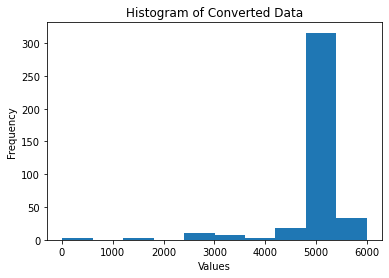

In [15]:
import matplotlib.pyplot as plt
data_transformed['battery_power'].apply(convert_abnormal_value)
plt.hist(data_transformed['battery_power'].apply(convert_abnormal_value))  # Drop NaN values and specify number of bins
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Converted Data')
plt.show()

In [16]:
index=data_transformed['battery_power'][pd.to_numeric(data_transformed['battery_power'], errors='coerce').isna()].index

print(data_transformed['battery_power'].apply(convert_abnormal_value).loc[index])

data_transformed['battery_power'].apply(convert_abnormal_value).loc[index].isna().sum()

9         NaN
23        NaN
24        NaN
44     1450.0
153       NaN
        ...  
418    5000.0
419       NaN
422    3200.0
423    5000.0
426       NaN
Name: battery_power, Length: 62, dtype: float64


39

Got 39 null values which are of the type '[]' as expected

In [17]:
data_transformed['battery_power']=data_transformed['battery_power'].apply(convert_abnormal_value)


In [18]:
def transform_ram(df):
    try :

        df=int(df.split()[0])
        return df

    except ValueError:
        return np.nan

In [19]:
data_transformed['ram'].apply(lambda x: transform_ram(x)).value_counts()

4.0      93
6.0      88
8.0      69
128.0    35
3.0      30
2.0      25
64.0     23
256.0    20
12.0      6
16.0      3
32.0      2
Name: ram, dtype: int64

In [20]:
data_transformed[data_transformed['ram'].apply(lambda x: transform_ram(x))==32]



,Unnamed: 0,title,price,rating,brand,screen_size,battery_power,ram,storage,operating_system,item_weight
170,170,"realme narzo 50i (Mint Green, 2GB RAM+32GB Sto...",6499.0,4.0,Realme,6.500000,5000.0,32 GB,2 GB,Android 11.0,182 grams
176,176,"Micromax X512 Anniversary Edition 1750 mAh, To...",999.0,3.5,Micromax,1.767717,1750.0,32 MB,32 MB,SPREADTRUM,250 grams


In [21]:
from scipy import stats



transformed_data, lambda_value = stats.boxcox( data_transformed['ram'].apply(lambda x: transform_ram(x)))

q25 , q75 = np.percentile(transformed_data, [25, 75])
q25=data_transformed['ram'].apply(lambda x: transform_ram(x)).quantile(0.25)
q75=data_transformed['ram'].apply(lambda x: transform_ram(x)).quantile(0.75)

iqr = q75 - q25
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr

outliers = (transformed_data < lower_bound) | (transformed_data > upper_bound)

print(sum(outliers==False),lambda_value,upper_bound)

40 8.472135811722177 14.0


In [22]:
data_transformed['ram']=data_transformed['ram'].apply(lambda x: transform_ram(x))

Here  some ram values are abnormal  with storage space having less than them , lets eliminate those values

In [23]:
data_transformed[data_transformed['ram']==32]

,Unnamed: 0,title,price,rating,brand,screen_size,battery_power,ram,storage,operating_system,item_weight
170,170,"realme narzo 50i (Mint Green, 2GB RAM+32GB Sto...",6499.0,4.0,Realme,6.500000,5000.0,32.0,2 GB,Android 11.0,182 grams
176,176,"Micromax X512 Anniversary Edition 1750 mAh, To...",999.0,3.5,Micromax,1.767717,1750.0,32.0,32 MB,SPREADTRUM,250 grams


In [24]:
data_transformed['ram'][data_transformed['ram']>16] = np.nan

C:\Users\Harshith\AppData\Local\Temp\ipykernel_12832\1743083818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_transformed['ram'][data_transformed['ram']>16] = np.nan


In [25]:
data_transformed['ram'].value_counts()

4.0     93
6.0     88
8.0     69
3.0     30
2.0     25
12.0     6
16.0     3
Name: ram, dtype: int64

In [26]:
data_transformed['storage'].value_counts()

128 GB    138
64 GB      77
4 GB       76
[]         39
256 GB     26
32 GB      21
8 GB       20
6 GB       14
16 GB       5
512 GB      4
2 GB        4
12 GB       2
64          2
128         1
32 MB       1
48 MB       1
1 GB        1
256         1
0 GB        1
Name: storage, dtype: int64

In [27]:
def transform_storage(df):
    try :
        if len(df.split())>1 and df.split()[1] != 'MB':
            df=int(df.split()[0])
            return df

        
        return np.nan

    except ValueError:
        return np.nan

In [28]:
data_transformed['storage'].str.split()[1][0]

'4'

In [29]:
data_transformed['storage']=data_transformed['storage'].apply(lambda x: transform_storage(x))

In [30]:

# data_transformed[data_transformed['storage'].apply(lambda x: transform_storage(x))==512]
data_transformed['storage'][data_transformed['storage']<12]=np.nan

C:\Users\Harshith\AppData\Local\Temp\ipykernel_12832\1330777185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_transformed['storage'][data_transformed['storage']<12]=np.nan


In [31]:
def transform_weight(df):
    try :
        
        df=int(df.split()[0])
        return df


    except ValueError:
        return np.nan

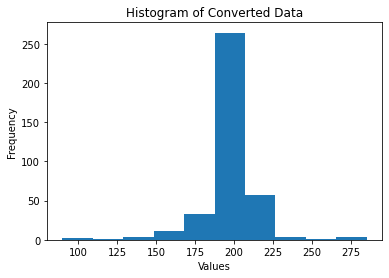

In [32]:
data_transformed['item_weight'].apply(lambda x: transform_weight(x))
plt.hist(data_transformed['item_weight'].apply(lambda x: transform_weight(x)))  # Drop NaN values and specify number of bins
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Converted Data')
plt.show()

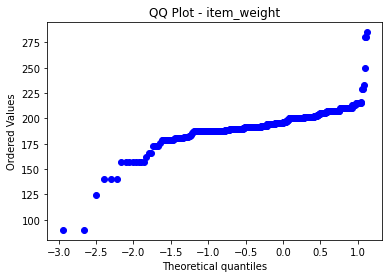

In [33]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Perform QQ plot
qqplot = stats.probplot(data_transformed['item_weight'].apply(lambda x: transform_weight(x)), dist="norm", plot=plt)

# Display the QQ plot
plt.title("QQ Plot - item_weight")
plt.show()

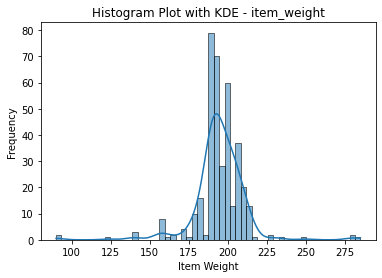

In [34]:
import seaborn as sns

# Create histogram plot with KDE
sns.histplot(data_transformed['item_weight'].apply(lambda x: transform_weight(x)), kde=True)

# Set plot title and labels
plt.title("Histogram Plot with KDE - item_weight")
plt.xlabel("Item Weight")
plt.ylabel("Frequency")

# Display the plot
plt.show()

In [35]:
data_transformed['item_weight']=data_transformed['item_weight'].apply(lambda x: transform_weight(x))

In [36]:
data_transformed.columns 

Index(['Unnamed: 0', 'title', 'price', 'rating', 'brand', 'screen_size',
       'battery_power', 'ram', 'storage', 'operating_system', 'item_weight'],
      dtype='object')

In [37]:
# Remove the column 'Unnamed: 0'
data_transformed = data_transformed.drop('Unnamed: 0', axis=1)

# Rename the columns
data_transformed = data_transformed.rename(columns={
    'screen_size': 'screen_size(inches)',
    'ram': 'ram(GB)',
    'storage': 'storage(GB)',
    'item_weight': 'item_weight(grams)'
})








In [38]:
data_transformed = data_transformed.rename(columns={
    'battery_power': 'battery_power(MAH)'})

In [39]:
data_transformed.describe()

,price,rating,screen_size(inches),battery_power(MAH),ram(GB),storage(GB),item_weight(grams)
count,433.000000,424.000000,434.000000,395.000000,314.000000,273.000000,378.000000
mean,16928.942263,3.873585,5.832364,4924.516456,5.452229,117.479853,194.597884
std,12706.409441,0.451224,2.040368,722.568161,2.357629,76.315766,16.935114
min,649.000000,1.000000,0.000000,10.000000,2.000000,12.000000,90.000000
25%,8999.000000,3.800000,6.500000,5000.000000,4.000000,64.000000,188.250000
50%,12999.000000,3.900000,6.580000,5000.000000,6.000000,128.000000,194.000000
75%,19999.000000,4.100000,6.670000,5000.000000,6.000000,128.000000,201.000000
max,134999.000000,5.000000,6.800000,6000.000000,16.000000,512.000000,285.000000


Changing brand names to All Caps 

In [48]:
data_transformed['brand']=data_transformed['brand'].str.upper()
data_transformed[data_transformed['brand']=='POCO BY XIAOMI']='POCO'

In [49]:
data_transformed['brand'].unique()

array(['REDMI', 'REALME', 'SAMSUNG', 'ONEPLUS', 'NOKIA', 'TECNO', 'LAVA',
       'IQOO', 'PORTRONICS', 'AMKETTE', 'OPPO', 'ITEL', 'VIVO', 'XIAOMI',
       'IKALL', 'MICROMAX', 'XIFO', 'POCO', 'MOTOROLA', 'MI', 'GENERIC',
       'FRND', 'INFINIX', 'SHIVANSH'], dtype=object)